In [4]:
import pandas_datareader as pdr

In [5]:
# Set the start and end dates for the data
start_date = '1990-01-01'
end_date = '2022-01-01'

In [6]:
# Define the Fama-French 3 Factors dataset
# ff_factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start=start_date, end=end_date)
ff_factors = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start=start_date, end=end_date)

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_34476\3590027444.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factors = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start=start_date, end=end_date)
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_34476\3590027444.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factors = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start=start_date, end=end_date)


In [7]:
# Access the factor returns data
factor_returns = ff_factors[0]

In [8]:
# Display the data
print(factor_returns.head())

         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
1990-01   -7.85 -1.31  0.85 -1.17  1.35  0.57
1990-02    1.11  1.17  0.64 -0.03 -0.66  0.57
1990-03    1.83  1.62 -2.92  2.04 -1.02  0.64
1990-04   -3.36 -0.33 -2.59  1.78 -0.98  0.69
1990-05    8.42 -2.35 -3.83  1.57 -1.68  0.68


In [9]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [10]:
momentum_retns = pdr.get_data_famafrench('F-F_Momentum_Factor', start=start_date, end=end_date)[0]
# pdr.get_data_famafrench('6_Portfolios_2x3', start=start_date, end=end_date)[0]
momentum_retns.head()

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_34476\1043549712.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  momentum_retns = pdr.get_data_famafrench('F-F_Momentum_Factor', start=start_date, end=end_date)[0]
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_34476\1043549712.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  momentum_retns = pdr.get_data_famafrench('F-F_Momentum_Factor', start=start_date, end=end_date)[0]


,Mom
Date,
1990-01,-3.27
1990-02,-0.55
1990-03,1.80
1990-04,2.39
1990-05,3.03


In [11]:
factor_returns = factor_returns.merge(momentum_retns, left_index=True, right_index=True)

In [12]:
factor_returns.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1990-01,-7.85,-1.31,0.85,-1.17,1.35,0.57,-3.27
1990-02,1.11,1.17,0.64,-0.03,-0.66,0.57,-0.55
1990-03,1.83,1.62,-2.92,2.04,-1.02,0.64,1.80
1990-04,-3.36,-0.33,-2.59,1.78,-0.98,0.69,2.39
1990-05,8.42,-2.35,-3.83,1.57,-1.68,0.68,3.03


In [35]:
factor_returns.to_csv('Factor_Returns_Final.csv')

In [14]:
features_df = factor_returns.shift(2)
features_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1990-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03,-7.85,-1.31,0.85,-1.17,1.35,0.57,-3.27
1990-04,1.11,1.17,0.64,-0.03,-0.66,0.57,-0.55
1990-05,1.83,1.62,-2.92,2.04,-1.02,0.64,1.80


In [15]:
features_df = features_df.dropna()

In [16]:
features_df.isna().sum()

Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
Mom       0
dtype: int64

In [17]:
def feature_engineering(df):
    # Copy the input DataFrame to avoid modifying the original data
    df_copy = df.copy()

    # Calculate lagged returns for each factor
    factor_columns = df_copy.columns
    for factor in factor_columns:
        df_copy[factor + '_lag1'] = df_copy[factor].shift(1)

    # Calculate rolling statistics for each factor
    for factor in factor_columns:
        df_copy[factor + '_rolling_mean'] = df_copy[factor].rolling(window=3).mean()
        df_copy[factor + '_rolling_std'] = df_copy[factor].rolling(window=3).std()

    # Create interaction features
    for i in range(len(factor_columns)):
        for j in range(i + 1, len(factor_columns)):
            factor1 = factor_columns[i]
            factor2 = factor_columns[j]
            df_copy[factor1 + '_' + factor2 + '_interaction'] = df_copy[factor1] * df_copy[factor2]

    # Calculate returns spread between two factors
    for i in range(len(factor_columns)):
        for j in range(i + 1, len(factor_columns)):
            factor1 = factor_columns[i]
            factor2 = factor_columns[j]
            df_copy[factor1 + '_' + factor2 + '_spread'] = df_copy[factor1] - df_copy[factor2]

    return df_copy

In [18]:
df_with_features = feature_engineering(features_df[[]])

In [19]:
df_with_features

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom,Mkt-RF_lag1,SMB_lag1,HML_lag1,...,HML_RMW_spread,HML_CMA_spread,HML_RF_spread,HML_Mom _spread,RMW_CMA_spread,RMW_RF_spread,RMW_Mom _spread,CMA_RF_spread,CMA_Mom _spread,RF_Mom _spread
Date,,,,,,,,,,,,,,,,,,,,,
1990-03,-7.85,-1.31,0.85,-1.17,1.35,0.57,-3.27,NaN,NaN,NaN,...,2.02,-0.50,0.28,4.12,-2.52,-1.74,2.10,0.78,4.62,3.84
1990-04,1.11,1.17,0.64,-0.03,-0.66,0.57,-0.55,-7.85,-1.31,0.85,...,0.67,1.30,0.07,1.19,0.63,-0.60,0.52,-1.23,-0.11,1.12
1990-05,1.83,1.62,-2.92,2.04,-1.02,0.64,1.80,1.11,1.17,0.64,...,-4.96,-1.90,-3.56,-4.72,3.06,1.40,0.24,-1.66,-2.82,-1.16
1990-06,-3.36,-0.33,-2.59,1.78,-0.98,0.69,2.39,1.83,1.62,-2.92,...,-4.37,-1.61,-3.28,-4.98,2.76,1.09,-0.61,-1.67,-3.37,-1.70
1990-07,8.42,-2.35,-3.83,1.57,-1.68,0.68,3.03,-3.36,-0.33,-2.59,...,-5.40,-2.15,-4.51,-6.86,3.25,0.89,-1.46,-2.36,-4.71,-2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09,1.27,-4.61,-1.78,5.46,-0.52,0.00,-2.28,2.75,-0.34,-7.87,...,-7.24,-1.26,-1.78,0.50,5.98,5.46,7.74,-0.52,1.76,2.28
2021-10,2.91,-0.68,-0.15,-0.28,-1.79,0.00,2.45,1.27,-4.61,-1.78,...,0.13,1.64,-0.15,-2.60,1.51,-0.28,-2.73,-1.79,-4.24,-2.45
2021-11,-4.37,1.12,5.08,-1.96,2.10,0.00,1.49,2.91,-0.68,-0.15,...,7.04,2.98,5.08,3.59,-4.06,-1.96,-3.45,2.10,0.61,-1.49


<AxesSubplot:>

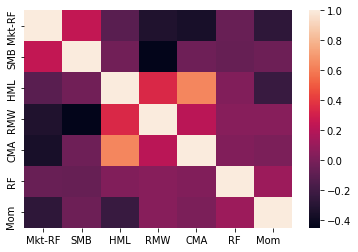

In [20]:
import seaborn as sns
sns.heatmap(factor_returns.corr())

In [21]:
factor_returns.corr().round(2)

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Mkt-RF,1.00,0.24,-0.12,-0.33,-0.36,-0.06,-0.28
SMB,0.24,1.00,-0.03,-0.45,-0.04,-0.07,-0.05
HML,-0.12,-0.03,1.00,0.34,0.64,0.02,-0.24
RMW,-0.33,-0.45,0.34,1.00,0.21,0.04,0.04
CMA,-0.36,-0.04,0.64,0.21,1.00,0.02,0.00
RF,-0.06,-0.07,0.02,0.04,0.02,1.00,0.11
Mom,-0.28,-0.05,-0.24,0.04,0.00,0.11,1.00


In [22]:
factor_returns.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Mom   '], dtype='object')

In [27]:
# weight_vector = factor_returns_df.apply(lambda x: abs(x))
weight_vector = factor_returns[['SMB', 'HML','RMW', 'CMA','Mom   ']].applymap(lambda x: abs(x) if x >= 0 else 1/abs(x))
weight_vector

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_34476\1830136224.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weight_vector = factor_returns[['SMB', 'HML','RMW', 'CMA','Mom   ']].applymap(lambda x: abs(x) if x >= 0 else 1/abs(x))


,SMB,HML,RMW,CMA,Mom
Date,,,,,
1990-01,0.763359,0.850000,0.854701,1.350000,0.305810
1990-02,1.170000,0.640000,33.333333,1.515152,1.818182
1990-03,1.620000,0.342466,2.040000,0.980392,1.800000
1990-04,3.030303,0.386100,1.780000,1.020408,2.390000
1990-05,0.425532,0.261097,1.570000,0.595238,3.030000
...,...,...,...,...,...
2021-09,1.120000,5.080000,0.510204,2.100000,1.490000
2021-10,0.370370,2.040816,1.660000,0.689655,3.190000
2021-11,0.564972,2.222222,7.200000,1.730000,0.880000


In [28]:
# Normalize each weight vector to sum to 1
normalized_weight_vectors = weight_vector.T / weight_vector.T.sum()
normalized_weight_vectors = normalized_weight_vectors.T

In [29]:
normalized_weight_vectors

,SMB,HML,RMW,CMA,Mom
Date,,,,,
1990-01,0.185107,0.206117,0.207257,0.327362,0.074156
1990-02,0.030408,0.016633,0.866326,0.039378,0.047254
1990-03,0.238837,0.050490,0.300758,0.144540,0.265375
1990-04,0.352082,0.044860,0.206813,0.118558,0.277687
1990-05,0.072346,0.044390,0.266922,0.101199,0.515143
...,...,...,...,...,...
2021-09,0.108736,0.493194,0.049533,0.203879,0.144657
2021-10,0.046583,0.256679,0.208783,0.086740,0.401215
2021-11,0.044849,0.176406,0.571556,0.137332,0.069857


In [31]:
df_with_features = df_with_features.dropna()
df_with_features.head(2)

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom,Mkt-RF_lag1,SMB_lag1,HML_lag1,...,HML_RMW_spread,HML_CMA_spread,HML_RF_spread,HML_Mom _spread,RMW_CMA_spread,RMW_RF_spread,RMW_Mom _spread,CMA_RF_spread,CMA_Mom _spread,RF_Mom _spread
Date,,,,,,,,,,,,,,,,,,,,,
1990-05,1.83,1.62,-2.92,2.04,-1.02,0.64,1.80,1.11,1.17,0.64,...,-4.96,-1.90,-3.56,-4.72,3.06,1.40,0.24,-1.66,-2.82,-1.16
1990-06,-3.36,-0.33,-2.59,1.78,-0.98,0.69,2.39,1.83,1.62,-2.92,...,-4.37,-1.61,-3.28,-4.98,2.76,1.09,-0.61,-1.67,-3.37,-1.70


In [33]:
normalized_weight_vectors[normalized_weight_vectors.index.isin(df_with_features.index)].to_csv("normalized_weight_vectors_final.csv")  

In [34]:
df_with_features.to_csv("df_with_features_final.csv")